In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The Ministerio de Educacion of Spain has contacted the school 
to get some help. He wants you to do a thorough analysis of the impact that
some student characteristics have on student performance. 
It's time to put those new modelling skills into practice!

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CodeOp-tech/DA-ML-Regression-Inference/master/datasets/spain.csv?token=AHM3F3GQPU5XT24QUHKTD7LAOWTHI')
data

,mother_has_secondary_education,mother_has_college_education,birth_month_num,birth_month_name,gender,internet_connection,repeated_secondary,score_math,n_students_in_school
0,1.0,1.0,9,September,Male,Yes,"No, never",468.2330,75.0
1,1.0,1.0,8,August,Female,Yes,"No, never",539.3369,75.0
2,1.0,1.0,11,November,Female,Yes,"No, never",619.6046,75.0
3,1.0,1.0,5,May,Male,Yes,"No, never",406.1378,75.0
4,1.0,1.0,2,February,Female,Yes,"No, never",508.2389,75.0
...,...,...,...,...,...,...,...,...,...
35938,1.0,1.0,3,March,Female,Yes,"No, never",494.6956,153.0
35939,1.0,1.0,7,July,Female,Yes,"No, never",582.8701,153.0
35940,1.0,1.0,10,October,Female,Yes,"No, never",546.3091,153.0
35941,1.0,1.0,5,May,Male,Yes,"No, never",623.5066,153.0


1. Do some EDA on it. Plot the distributions using some of the visualisations we've learnt in class. Try also to visualise bivariate relationships with our target. 

In [3]:
print(data.shape)
data.info()
data.describe()

(35943, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35943 entries, 0 to 35942
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mother_has_secondary_education  34486 non-null  float64
 1   mother_has_college_education    33810 non-null  float64
 2   birth_month_num                 35943 non-null  int64  
 3   birth_month_name                35943 non-null  object 
 4   gender                          35943 non-null  object 
 5   internet_connection             35371 non-null  object 
 6   repeated_secondary              34724 non-null  object 
 7   score_math                      35943 non-null  float64
 8   n_students_in_school            32605 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.5+ MB


,mother_has_secondary_education,mother_has_college_education,birth_month_num,score_math,n_students_in_school
count,34486.000000,33810.000000,35943.000000,35943.000000,32605.000000
mean,0.911703,0.614996,6.569012,491.160673,755.344518
std,0.283730,0.486604,3.428363,79.095658,444.448846
min,0.000000,0.000000,1.000000,169.983900,19.000000
25%,1.000000,0.000000,4.000000,436.976050,446.000000
50%,1.000000,1.000000,7.000000,496.096400,678.000000
75%,1.000000,1.000000,10.000000,548.904300,992.000000
max,1.000000,1.000000,12.000000,732.961000,2698.000000


In [4]:
data.isna().mean()

mother_has_secondary_education    0.040536
mother_has_college_education      0.059344
birth_month_num                   0.000000
birth_month_name                  0.000000
gender                            0.000000
internet_connection               0.015914
repeated_secondary                0.033915
score_math                        0.000000
n_students_in_school              0.092869
dtype: float64

<AxesSubplot:>

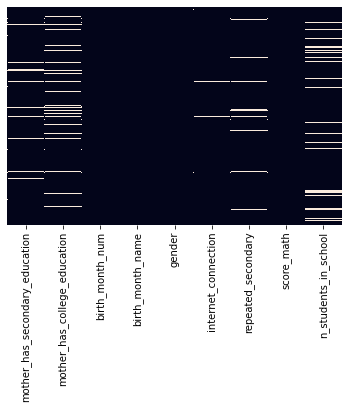

In [5]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

<AxesSubplot:>

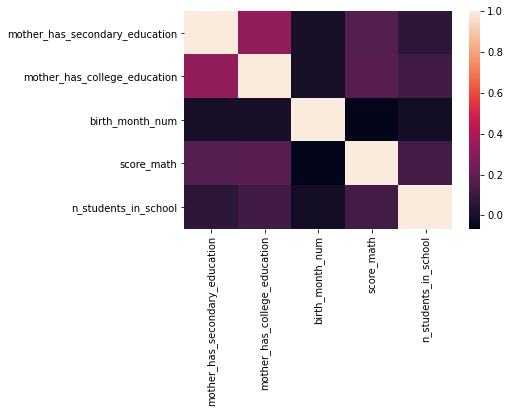

In [6]:
sns.heatmap(data.corr()) 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


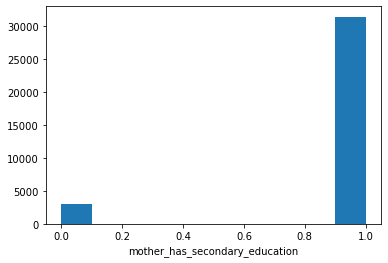

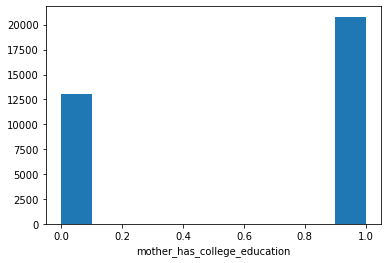

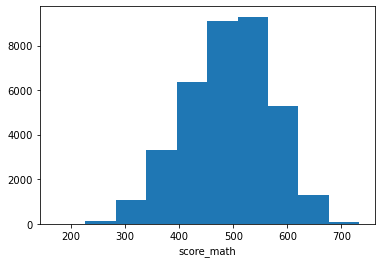

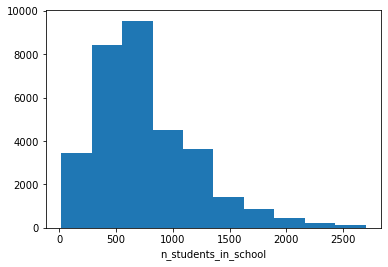

In [9]:
cols = data.select_dtypes('float').columns.values

for i in cols:
    plt.figure()
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()


In [12]:
cols = data.select_dtypes(exclude=['float']).columns.values
cols

array(['birth_month_num', 'birth_month_name', 'gender',
       'internet_connection', 'repeated_secondary'], dtype=object)

In [19]:
data['birth_month_name'].value_counts().index.tolist()

['May',
 'September',
 'July',
 'April',
 'October',
 'December',
 'August',
 'November',
 'January',
 'June',
 'March',
 'February']

In [20]:
data['birth_month_name'].value_counts().values.tolist()

[3164, 3157, 3091, 3090, 3074, 3023, 3013, 2979, 2903, 2841, 2826, 2782]

['birth_month_num' 'birth_month_name' 'gender' 'internet_connection'
 'repeated_secondary']


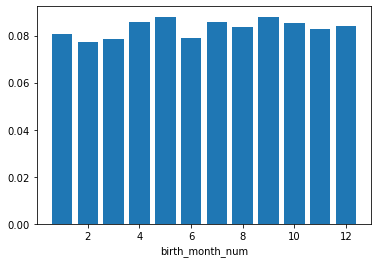

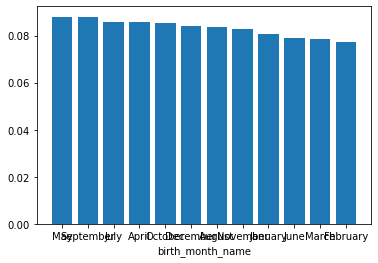

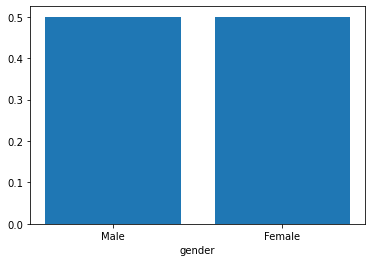

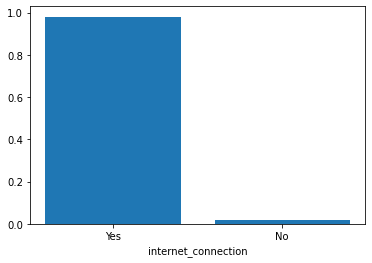

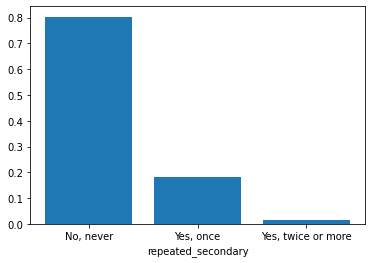

In [27]:
cols = data.select_dtypes(exclude=['float']).columns.values
print(cols)
for i in cols:
    plt.bar(data[i].value_counts().index.tolist(),
            data[i].value_counts(normalize=True).values.tolist())
    plt.xlabel(i)
    plt.show()


 
2. Prepare the data for modelling. You'll have to deal with missing values. Also, you'll have to turn categorical features into a format that an ML model can take.

In [51]:
X = pd.get_dummies(data[['birth_month_name','gender','internet_connection','repeated_secondary']],drop_first=True)
X

,birth_month_name_August,birth_month_name_December,birth_month_name_February,birth_month_name_January,birth_month_name_July,birth_month_name_June,birth_month_name_March,birth_month_name_May,birth_month_name_November,birth_month_name_October,birth_month_name_September,gender_Male,internet_connection_Yes,"repeated_secondary_Yes, once","repeated_secondary_Yes, twice or more"
0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35938,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
35939,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
35940,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
35941,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [52]:
X = pd.concat([X,data['n_students_in_school']],axis=1)
X

,birth_month_name_August,birth_month_name_December,birth_month_name_February,birth_month_name_January,birth_month_name_July,birth_month_name_June,birth_month_name_March,birth_month_name_May,birth_month_name_November,birth_month_name_October,birth_month_name_September,gender_Male,internet_connection_Yes,"repeated_secondary_Yes, once","repeated_secondary_Yes, twice or more",n_students_in_school
0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,75.0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,75.0
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,75.0
3,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,75.0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35938,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,153.0
35939,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,153.0
35940,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,153.0
35941,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,153.0


In [53]:
y = data['score_math']
y

0        468.2330
1        539.3369
2        619.6046
3        406.1378
4        508.2389
           ...   
35938    494.6956
35939    582.8701
35940    546.3091
35941    623.5066
35942    597.9505
Name: score_math, Length: 35943, dtype: float64


3. Fit a linear model and analyse the results. What do you see? Analyse the impact that those features have on student performance. Do they have a significative impact?

In [54]:
from statsmodels.api import OLS
ols = OLS(y,X,missing='drop')
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             score_math   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          5.106e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:41:37   Log-Likelihood:                     -1.9560e+05
No. Observations:               32605   AIC:                                  3.912e+05
Df Residuals:                   32589   BIC:                                  3.914e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
birth_month_name_August                 121.1269      2.448     49.479      0.000     116.329     125.925
birth_month_name_December               111.2339      2.441     45.570      0.000     106.450     116.018
birth_month_name_February               129.4015      2.497     51.821      0.000     124.507     134.296
birth_month_name_January                124.6499      2.472     50.432      0.000     119.805     129.494
birth_month_name_July                   125.7340      2.419     51.980      0.000     120.993     130.475
birth_month_name_June                   119.7337      2.482     48.233      0.000     114.868     124.599
birth_month_name_March                  120.4003      2.484     48.477      0.000     115.532     125.268
birth_month_name_May                    124.6781      2.401     51.928      0.000     119.972     129.384
birth_month_name_November               112.0815      2.449     45.763      0.000     107.281     116.882
birth_month_name_October                114.0500      2.424     47.045      0.000     109.298     118.802
birth_month_name_September              120.2677      2.411     49.881      0.000     115.542     124.994
gender_Male                              33.8145      1.074     31.494      0.000      31.710      35.919
internet_connection_Yes                 339.1012      1.788    189.664      0.000     335.597     342.606
repeated_secondary_Yes, once            -71.5919      1.418    -50.479      0.000     -74.372     -68.812
repeated_secondary_Yes, twice or more   -93.3120      4.877    -19.131      0.000    -102.872     -83.752
n_students_in_school                      0.0542      0.001     45.891      0.000       0.052       0.057
==============================================================================
Omnibus:                     5711.569   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14971.891
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                       5.707   Cond. No.                     9.28e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""